## Mateusz Sikora - algorytmy ewolucyjne - projekt - cz. 1

Zainstaluj pakiet ortools (pip install ortools)
https://developers.google.com/optimization/introduction/overview 
https://pypi.org/project/ortools/ i rozwiąż TSP dla $n$ miast. Jak duże $n$ można zadać, by program liczył się w 10 min.? Zbadaj zależność czasu wykonywania od $n$.

źródło:
https://developers.google.com/optimization/routing/tsp

In [1]:
#pip install ortools
import ortools
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import math
import sys
sys.path.append('Users\sikor\Documents\Projekt\lib_test')
#import test.func
#import test.draw
#import numpy as np
#import random
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#import string 
#import time
#import statistics as st
#from itertools import permutations
#from itertools import accumulate

In [2]:
from test import *

Invoking __init__.py for test


In [3]:
n=50
cities=np.array([[0.0352623 , 0.97311138],
       [0.73844339, 0.11084875],
       [0.64969091, 0.02062209],
       [0.52726704, 0.2147905 ],
       [0.1236814 , 0.68211836],
       [0.22627077, 0.75764456],
       [0.74660694, 0.4188424 ],
       [0.47121481, 0.99785666],
       [0.90461483, 0.39533574],
       [0.04167238, 0.168755  ],
       [0.42556931, 0.25341613],
       [0.43432433, 0.4176202 ],
       [0.04761922, 0.53909519],
       [0.30693386, 0.48789216],
       [0.81226819, 0.96194487],
       [0.56270438, 0.8935026 ],
       [0.26688656, 0.64777945],
       [0.13573137, 0.92684301],
       [0.75835666, 0.4661826 ],
       [0.70993164, 0.46173106],
       [0.68630424, 0.62814191],
       [0.84983729, 0.50472488],
       [0.49410748, 0.27438532],
       [0.8823515 , 0.54554099],
       [0.30455616, 0.0351696 ],
       [0.22357692, 0.48594047],
       [0.63329231, 0.01242043],
       [0.97941091, 0.24957209],
       [0.26023972, 0.36522329],
       [0.3492267 , 0.78758159],
       [0.50190588, 0.71441027],
       [0.97115877, 0.56105087],
       [0.75057174, 0.29355116],
       [0.0736678 , 0.27474762],
       [0.31599993, 0.30942591],
       [0.84114718, 0.95399361],
       [0.88477406, 0.27003497],
       [0.65218205, 0.6837114 ],
       [0.79597901, 0.77631415],
       [0.75668362, 0.19590046],
       [0.93041499, 0.17053482],
       [0.9741113 , 0.27515236],
       [0.3269101 , 0.2639916 ],
       [0.60029835, 0.98744972],
       [0.04302642, 0.5920408 ],
       [0.38156455, 0.57282448],
       [0.85665077, 0.82401429],
       [0.42699608, 0.76437125],
       [0.22300945, 0.23936316],
       [0.17677513, 0.7874222 ]]);

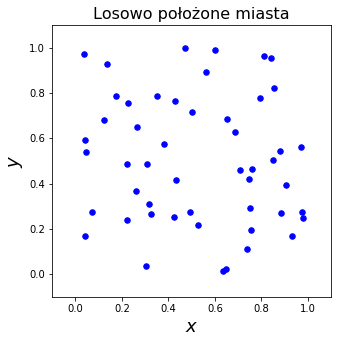

In [4]:
plt.figure(figsize=(5,5))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(cities[:,0],cities[:,1],c='blue', s=30)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [5]:
#program służący do obliczenia odlogłości pomiędzy wszystkimi punktami
y=0
x=0 #y oraz x to numery kolumn i wierszy macierzy
k = [[0] * n for i in range(n)] #definiuje k jako tablice dwuwymiarową 
for i in range(n):
    for j in range(n):
        #Twierdzenie Pitagorasa
        odl=cities[x]-cities[y]
        y=y+1
        odl=np.fabs(odl) #oblicza wartość bezwzględną
        odl=odl*odl
        hh=odl[0]+odl[1]
        hh=math.sqrt(hh) #oblicza pierwiastek
        k[i][j] = hh*1000000 #zwiększamy rozmiar wszystkich punktów, ponieważ program dokonuje zaokrągleń, przez co wyniki są mniej dokładne
    y=0
    x=x+1
print(k)

[[0.0, 1112636.7279701426, 1133471.8189488596, 903946.4703324207, 304129.7008408261, 287941.2893849253, 901790.0526436128, 436654.2337566172, 1043838.3551081127, 804381.921211753, 818719.008529607, 683974.3817172637, 434192.0619426414, 556096.3297579313, 777086.1239529839, 533416.0717561994, 399362.8206256467, 110611.01251286779, 883086.7689282283, 846574.598023906, 736790.0263107831, 939637.3384001671, 835916.8655628118, 948881.737184035, 975835.0094679263, 522300.5759674907, 1131621.4005896593, 1189506.4951225093, 648184.2095220344, 364684.723349915, 533556.4591216646, 1022592.8155722201, 986645.6747787233, 699418.9900993449, 720619.1920752164, 806111.6107229738, 1102717.855426666, 681426.6845113001, 785760.1813587255, 1060427.0531808347, 1202259.3202282402, 1169865.051362917, 766752.438295496, 565217.9453923575, 381149.6667988977, 529296.5621149192, 834810.7335770241, 443878.1322226916, 757387.2475070404, 233465.9560271718], [1112636.7279701426, 0.0, 126561.65644027422, 235370.64003

In [6]:
dd = [n for i in range(n)] #definiuje dd jako tablice jednowymiarową, po to żeby zapisać kolejność

In [7]:
def create_data_model(): #odczytuje i przechowuje dane dotyczące problemu - przede wszystkim odległość pomiędzy miastami
    data = {}
    data['distance_matrix'] = k
    data['num_vehicles'] = 1 #nie działa
    data['depot'] = 0 #powrót do punktu startowego po paliwo
    return data

def print_solution(manager, routing, solution): #wyświetla rozwiązanie problemu
    print('Objective: {} miles'.format(solution.ObjectiveValue())) #długość trasy
    index = routing.Start(0) #routing.Start(0) to punkt startowy, a index to każdy z tych punktów
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0 #długość trasy na początku wynosi 0, potem będzie zwiększany, wraz z wykonywaniem pętli
    while not routing.IsEnd(index): #pętla jest wykonywana dopóki nie dojdziemy do ostatniego punktu
        for i in range(n): #pętla dodana przeze mnie, żeby stworzyć tablicę dd
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            dd[i]=index
            route_distance += routing.GetArcCostForVehicle(previous_index, index, 0) #zwiększanie długości trasy 
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)

def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)

In [8]:
main()

Objective: 6130957 miles
Route for vehicle 0:
 0 -> 17 -> 49 -> 5 -> 29 -> 47 -> 30 -> 15 -> 7 -> 43 -> 14 -> 35 -> 46 -> 38 -> 37 -> 20 -> 19 -> 6 -> 18 -> 21 -> 23 -> 31 -> 8 -> 41 -> 27 -> 40 -> 36 -> 32 -> 39 -> 1 -> 2 -> 26 -> 24 -> 9 -> 33 -> 48 -> 34 -> 42 -> 10 -> 3 -> 22 -> 11 -> 28 -> 25 -> 13 -> 45 -> 16 -> 12 -> 44 -> 4 -> 0



In [9]:
print(dd)
dd[n-1]=0
sequence=np.array(dd)
sequence=np.insert(sequence,0,0) #dodaje zero na początku
print()
print(sequence)

[17, 49, 5, 29, 47, 30, 15, 7, 43, 14, 35, 46, 38, 37, 20, 19, 6, 18, 21, 23, 31, 8, 41, 27, 40, 36, 32, 39, 1, 2, 26, 24, 9, 33, 48, 34, 42, 10, 3, 22, 11, 28, 25, 13, 45, 16, 12, 44, 4, 50]

[ 0 17 49  5 29 47 30 15  7 43 14 35 46 38 37 20 19  6 18 21 23 31  8 41
 27 40 36 32 39  1  2 26 24  9 33 48 34 42 10  3 22 11 28 25 13 45 16 12
 44  4  0]


In [10]:
#program do obliczania długości trasy
x=0
dlug=0
for i in range(n):
    dlug=dlug+k[sequence[x]][sequence[x+1]]
    x=x+1
dlug=dlug/1000000
dlug=(round(dlug, 3))
print(dlug)

6.131


In [11]:
tour=np.array([cities[i] for i in sequence])
tour

array([[0.0352623 , 0.97311138],
       [0.13573137, 0.92684301],
       [0.17677513, 0.7874222 ],
       [0.22627077, 0.75764456],
       [0.3492267 , 0.78758159],
       [0.42699608, 0.76437125],
       [0.50190588, 0.71441027],
       [0.56270438, 0.8935026 ],
       [0.47121481, 0.99785666],
       [0.60029835, 0.98744972],
       [0.81226819, 0.96194487],
       [0.84114718, 0.95399361],
       [0.85665077, 0.82401429],
       [0.79597901, 0.77631415],
       [0.65218205, 0.6837114 ],
       [0.68630424, 0.62814191],
       [0.70993164, 0.46173106],
       [0.74660694, 0.4188424 ],
       [0.75835666, 0.4661826 ],
       [0.84983729, 0.50472488],
       [0.8823515 , 0.54554099],
       [0.97115877, 0.56105087],
       [0.90461483, 0.39533574],
       [0.9741113 , 0.27515236],
       [0.97941091, 0.24957209],
       [0.93041499, 0.17053482],
       [0.88477406, 0.27003497],
       [0.75057174, 0.29355116],
       [0.75668362, 0.19590046],
       [0.73844339, 0.11084875],
       [0.

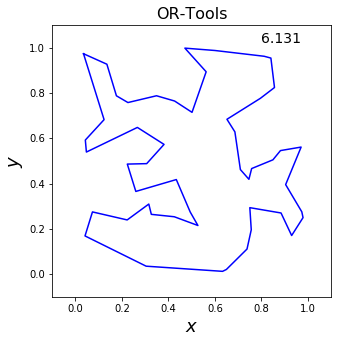

In [12]:
plt.figure(figsize=(5,5))
plt.title("OR-Tools",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

#plt.scatter(cities[:,0],cities[:,1],c='red', s=20)

#plt.fill(tour[:,0],tour[:,1],c='blue')

plt.plot(tour[:,0],tour[:,1],c='blue')

plt.annotate(dlug, (.8,1.02),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [13]:
#najlepszy wynik dla algorytmu genetycznego - 6.271